Este conjunto de datos se puede utilizar para predecir la gravedad (benigna o maligna)
de una masa mamográfica a partir de los atributos BI-RADS y la edad de la paciente. Contiene una evaluación BI-RADS, la edad del paciente y tres atributos BI-RADS junto con la gravedad para 516 casos benignos y 445 masas malignas que se han identificado en mamografías digitales de campo completo recogidos en el Instituto de Radiología de la Universidad Erlangen-Nuremberg entre 2003 y 2006.
Cada instancia tiene una evaluación BI-RADS asociada que varía de 1 (definitivamente benigna)
a 5 (altamente sugestivo de malignidad) asignado en un proceso de doble revisión por
médicos

### Ejercicio

- Generar un conjunto de entrenamiento y uno de prueba
- Entrenar el modelo
- Hacer predicciones sobre el conjunto de prueba
- Evaluar el modelo

¿El modelo logra clasificar correctamente los casos de prueba?
¿Cómo afectaría en la realidad el error de este modelo?


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt

## Obtener datos

In [2]:
df = pd.read_csv('mammogram_dataset.csv')
df.head()

,BI_RADS_assessment,age,shape,margin,density,severity
0,5,67,3,5,3,1
1,4,43,1,1,-100000,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,-100000,1


### Obtener subconjunto de atributos

In [3]:
data=df.values[:,:4]
data

array([[ 5, 67,  3,  5],
       [ 4, 43,  1,  1],
       [ 5, 58,  4,  5],
       ...,
       [ 4, 64,  4,  5],
       [ 5, 66,  4,  5],
       [ 4, 62,  3,  3]], dtype=int64)

### Obtener subconjunto de clases

In [4]:
target=df.values[:,4]
target

array([      3, -100000,       3,       3, -100000,       3,       3,
             3,       3,       1,       3,       3,       3,       2,
             2,       3,       3,       3,       3, -100000,       1,
             1, -100000,       3,       3,       3, -100000,       3,
             3,       3,       2,       3,       3,       2,       3,
       -100000,       3,       2, -100000,       2, -100000,       1,
             3, -100000,       2, -100000,       3, -100000,       4,
             3,       2,       3, -100000, -100000,       3, -100000,
             1, -100000, -100000, -100000,       3,       3,       3,
       -100000,       3, -100000,       3, -100000,       3,       3,
             2,       3,       3,       3, -100000,       3,       2,
             3,       2,       1,       3,       2,       3,       1,
       -100000, -100000,       3, -100000, -100000,       3,       3,
             3, -100000,       3,       3,       3, -100000, -100000,
             3,     

## Generar un conjunto de entrenamiento y uno de prueba

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5, random_state=89)

## Entrenar modelo

In [6]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

## Obtener Predicciones

In [7]:
y_pred = gnb.predict(X_test)
y_pred

array([      2,       2,       2,       2,       4,       2,       2,
             2,       4,       2,       2,       2,       2,       2,
             2,       2,       2,       2,       2,       2,       2,
             2, -100000,       2,       2,       2,       2,       2,
             2,       2,       2,       2,       2,       2,       2,
             2,       2,       2,       2,       2,       2,       2,
             2,       2, -100000,       2,       2,       2,       2,
             2,       2,       2,       2,       2,       2,       2,
             2,       2,       2,       2,       2,       2,       2,
             2,       2,       2,       2,       2,       2,       2,
             2,       2,       2,       2, -100000,       2,       2,
             2,       2,       2,       2,       2,       2,       2,
             2,       2,       2,       2,       2,       2,       2,
             2,       2,       2,       2,       2,       2,       2,
             2,     

## Comprobar las predicciones

Las prediccion son un:  9.147609147609149 % certeras


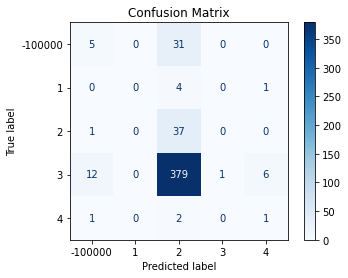

In [8]:
print('Las prediccion son un: ', metrics.accuracy_score(y_test, y_pred)*100, '% certeras')
metrics.confusion_matrix(y_test, y_pred)
disp = metrics.plot_confusion_matrix(gnb, X_test, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
plt.show()

# Conclusion

